In [2]:
# plots will be shown inline 
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy
from numpy import sqrt,floor

import numpy as np
import scipy as sp
from scipy import stats

import pandas as pd
import random
import math

# libreria locale
import my_lib_santanastasio as my

In [6]:
# modello e valori di x

df = pd.read_csv('misure_2/Angolo25/RawData2.csv')
y = df['Gyroscope y (rad/s)'].to_numpy()
x = df['Time (s)'].to_numpy()

ux = []
uy = []

print (x)
print (ux)
print (y)
print (uy)

[3.00623782e-01 3.02625782e-01 3.04627282e-01 ... 4.74073049e+02
 4.74075051e+02 4.74077052e+02]
[]
[ 0.06743769  0.06865942  0.07232462 ... -0.00036835  0.00085338
 -0.00097922]
[]


In [3]:
#prima iterazione (assumo sigma x=0)

m         =  2.9629
sigma(m)  =  0.4404
c         =  1.7018
sigma(c)  =  1.5648
cov(m, c) =  -0.6303
rho(m, c) =  -0.9147


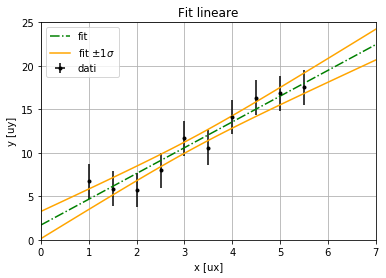

In [4]:
m0, sm0, c0, sc0, cov0, rho0 = my.lin_fit(x, y, uy, "x [ux]", "y [uy]", 0, 7, 0, 25, plot=True, setrange=True)

m         =  2.9629
sigma(m)  =  0.4452
c         =  1.7018
sigma(c)  =  1.5818
cov(m, c) =  -0.6441
rho(m, c) =  -0.9147


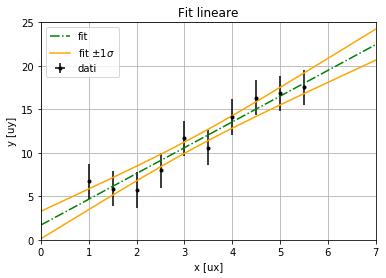

In [5]:
# nuove y
uy_new = np.sqrt(uy**2+(m0*ux)**2)
m, sm, c, sc, cov, rho = my.lin_fit(x, y, uy_new, "x [ux]", "y [uy]", 0, 7, 0, 25, plot=True, setrange=True)
#m, sm, c, sc, cov, rho = my.lin_fit(x, y, uy_new, "x [ux]", "y [uy]", -2, 9, -10, 40, plot=True, setrange=True)

In [6]:
# Studio dei residui
y_atteso = m*x + c
d = y - y_atteso
d_norm = d / uy_new

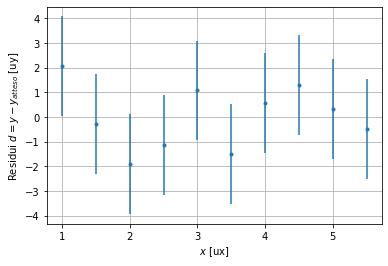

In [7]:
plt.errorbar(x,d,uy_new,marker='.',linestyle="")
plt.ylabel("Residui $d=y-y_{atteso}$ [uy]")
plt.xlabel("$x$ [ux]")
plt.grid()

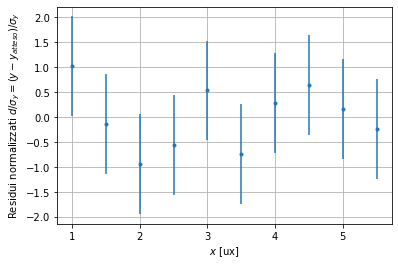

In [8]:
plt.errorbar(x,d_norm,uy_new/uy_new,marker='.',linestyle="")
plt.ylabel("Residui normalizzati $d/\sigma_y=(y-y_{atteso})/\sigma_y$")
plt.xlabel("$x$ [ux]")
plt.grid()

1.371270223497948
m         =  2.9629
sigma(m)  =  0.3019
c         =  1.7018
sigma(c)  =  1.0729
cov(m, c) =  -0.2963
rho(m, c) =  -0.9147


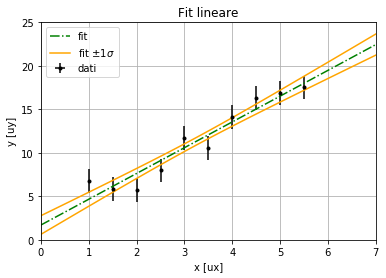

In [9]:
# Incertezze a posteriori
sigmy_post = math.sqrt( np.sum(d**2)/(d.size-2) )
uy_post = np.repeat(sigmy_post,y.size)
print (sigmy_post)

# Nuovo fit con incertezze a posteriori sulle y
m1, sm1, c1, sc1, cov1, rho1 = my.lin_fit(x, y, uy_post, "x [ux]", "y [uy]", 0, 7, 0, 25, plot=True, setrange=True)

m         =  52.8124
sigma(m)  =  5.568
c         =  1170.9569
sigma(c)  =  32.0682
cov(m, c) =  -148.1941
rho(m, c) =  -0.83


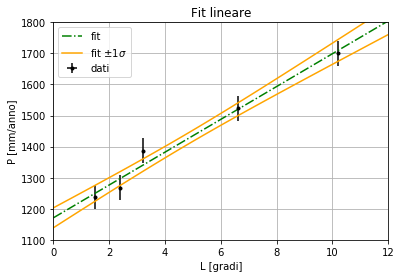

In [15]:
L = np.array([1.5,2.4,3.2,6.6,10.2])
P = np.array([1238,1267,1387,1524,1701])
uP = np.repeat(40,len(L))
m2, sm2, c2, sc2, cov2, rho2 = my.lin_fit(L, P, uP, "L [gradi]", "P [mm/anno]", 0, 12, 1100, 1800, plot=True, setrange=True)

In [34]:
residui = P - (m2*L+c2)
residuiNorm = residui / uP

chi2_data = np.sum(residuiNorm**2)
ndf = len(L) - 2
redChi2_data = chi2_data / ndf

print ("chi2 misurato: ", chi2_data.round(2))
print ("ndf: ",  ndf)
print ("chi2 mis./ndf: ",  (chi2_data/ndf).round(2))

chi2 misurato:  2.12
ndf:  3
chi2 mis./ndf:  0.71


In [47]:
from scipy.stats import chi2
p_value = 1-chi2.cdf(chi2_data, ndf)
alpha = 0.05
if p_value>alpha:
    print ("p_value={0} > {1}".format(p_value.round(2),alpha))
    print ("Test del Chi2 al livello di significatività alpha={0} superato".format(alpha))
else:
    print ("p_value={0} < {1}".format(p_value.round(2),alpha))
    print ("Test del Chi2 al livello di significatività alpha={0} non superato".format(alpha))

p_value=0.55 > 0.05
Test del Chi2 al livello di significatività alpha=0.05 superato
